# Backward induction

In [1]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. load packages 
import numpy as np

# c. local modules
from mytest import child_model

Estimate the model in order to extract the parameters and the transision probabilities 

In [2]:
# Step 1: Create an instance of child_model
model = child_model()

## Define the utility

Initial utility for number of chrildren and contracepting 

In [145]:
def util(N,d,model):
    util = model.eta2 * N - model.eta2 * (N**2) + model.mu * d 
    
    if N > 1:
        util += model.eta1

    return util

Utility with education and utility for having chrildren 

In [4]:
def edu_util(N, d, e_w, e_m, model):
    
    util = model.eta2 * N + model.eta3 * (N ** 2) + model.mu * d
    
    if N > 1:
        util += model.eta1
    
    if isinstance(N, int):
        if N == 1:
            util += model.gamma1 * e_w + model.alpha1 * e_m
        elif N == 2:
            util += model.gamma2 * e_w + model.alpha2 * e_m
        elif N > 2:
            util += (model.gamma3 * e_w + model.alpha3 * e_m) * sum()
    
    return util  # Default return if N doesn't match any condition


The full utility (not workning)

In [5]:
# def utility_function(N, E1, E2, R=0, dur=1, d_prev, t):
#     eta1 = 0.05
#     eta2 = 0.15
#     eta3 = -0.04

#     gamma1 = -0.0636
#     alpha1 = 0.0075
#     gamma2 = 0.0052
#     alpha2 = 0.0140
#     gamma3 = -0.0115
#     alpha3 = -0.0211

#     mu0 = -0.12
#     mu11 = 0.05
#     mu12 = 0.1
#     mu21 = 0.1
#     mu22 = 0.2
#     mu33 = 0.15

#     psi0 = -0.02
#     psi1 = 0.01
#     psi2 = 0.02
#     psi3 = 0.03

#     if t >= 36:
#         b = 1
#     else:
#         b = 0

#     I = [int(N >= 1), int(N == 1), int(N == 2)] + [int(N > 2)] * (len(N) - 3)

#     u = eta1 * I[0] + eta2 * N + eta3 * N**2
#     if I[0] == 1:
#         u += (gamma1 * E1 + alpha1 * E2)
#     u += (gamma2 * E1 + alpha2 * E2) * I[1]
#     u += (gamma3 * E1 + alpha3 * E2) * sum(I[2:])
#     u += mu0 * d_prev[0] * d_prev[1] + mu11 + mu12 * R + mu33 * t * d_prev[2]
#     u += psi0 * (t - 35) * (t >= 36) * b
#     u += (psi1 * dur[0] + psi2 * dur[1] + psi3 * dur[2]) * b

#     return u


In [6]:
for N in range(4):
    print(N, [int(N >= 1), int(N == 1), int(N == 2), int(N > 2)])

0 [0, 0, 0, 0]
1 [1, 1, 0, 0]
2 [1, 0, 1, 0]
3 [1, 0, 0, 1]


## Backwards induction

In [146]:
# Reset the parameters 
model.mu = -0.05
model.eta2 = 0.15
model.eta3 = -0.1

# The utility for having chrildren 
model.eta1 = 0.05

# The effect on women's education 
model.gamma1 = -0.0636
model.gamma2 = 0.0052
model.gamma3 = -0.0115

# The effect on men's education 
model.alpha1 = 0.0075
model.alpha2 = 0.0140
model.alpha3 = -0.0211

# Define which utility function to use
utility = util

# Step 2: Initialize value function and policy
n = model.n
T = model.T
V = np.nan + np.zeros([n, T + 1])
D = np.zeros([n, T + 1])
D[:,T] = 0
V[:,T] = utility(np.arange(n), D[:,T], model)
pk = np.zeros([n + 1, T])


# Step 3: Backward induction
for t in range(T-1, -1, -1):
    for nn in range(n):
        for d in range(2):
            if d == 0:
                # Value at time t 
                if t == 0 and nn == 1 or nn == 2 or nn == 3 or nn == 4:
                    value_0[nn] = 0
                elif t == 1 and nn == 2 or nn == 3 or nn == 4:
                    value_0[nn] = 0
                elif t == 2 and nn == 3 or nn == 4:
                    value_0[nn] = 0
                elif t == 3 and nn == 4:
                    value_0[nn] = 0
                else:
                    value_0 = util(nn, 0, model) + model.beta * model.P1 @ V[:, t+1]
                #print(t, nn, 'value_0', value_0)
            if d == 1:
                if t == 0 and nn == 1 or nn == 2 or nn == 3 or nn == 4:
                    value_1[nn] = 0
                elif t == 1 and nn == 2 or nn == 3 or nn == 4:
                    value_1[nn] = 0
                elif t == 2 and nn == 3 or nn == 4:
                    value_1[nn] = 0
                elif t == 3 and nn == 4:
                    value_1[nn] = 0
                else:
                    value_1 = util(nn, 1, model) + model.beta * model.P2 @ V[:, t+1]
                #print(t, nn, 'value_1', value_1)
        # V[nn, t] = np.maximum(value_0[nn], value_1[nn])
        # D[nn, t] = np.argmax([value_0[nn], value_1[nn]])
        maxV = np.maximum(value_0[nn], value_1[nn])
        logsum = maxV + np.log(np.exp(value_0[nn] - maxV) + np.exp(value_1[nn] - maxV))
        V[nn, t] = logsum
        pk[nn, t] = 1/(1 + np.exp(value_1[nn] - value_0[nn]))
        #print(nn, t, pk[nn, t])

        D[nn, t] = 1 - pk[nn, t]
        
print(D.round(0))
   
print(V.round(1))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [241]:
def util(N, d, model, e_w = None, e_m = None, t = None):
    util = 0
    if N > 0:
        util += model.eta1
    if N > 0:
        util += model.eta2 * N + model.eta3 * (N**2) + model.mu * d
    if t is not None and t > 12:
        util += model.psi0
    return util

In [266]:
# Reset the parameters 
model.mu = -0.05
model.eta2 = 0.15
model.eta3 = -0.15

# The utility for having children 
model.eta1 = 0.05

# The effect on women's education 
model.gamma1 = -0.0636
model.gamma2 = 0.0052
model.gamma3 = -0.0115

# The effect on men's education 
model.alpha1 = 0.0075
model.alpha2 = 0.0140
model.alpha3 = -0.0211

model.T = 44 - 23

# The effect of the women beting above 35 years old
model.psi0 = -0.02

# Define which utility function to use
utility = util

# Step 2: Initialize value function and policy
n = model.n
#T = model.T
T = 5
V = np.nan + np.zeros([n, T])
D = np.nan + np.zeros([n, T])
# De
D[:, T - 1] = 0
for nnn in range(n):
    V[nnn, T - 1] = utility(nnn, 0, model)
pk =  np.nan + np.zeros([n, T])
pk[:, T - 1] = 0

# Step 3: Backward induction
for t in range(T - 2, -1, -1):
    print('t', t)
    for nn in range(n):
        print('n', nn)
        for d in range(2):
            if d == 0:
                # Value at time t 
                # if (t == 0 and nn in [1, 2, 3, 4]) or (t == 1 and nn in [2, 3, 4]) or \
                #    (t == 2 and nn in [3, 4]) or (t == 3 and nn == 4):
                #     value_0 = model.beta * model.P1 @ V[:, t + 1]
                # else:
                value_0 = utility(nn, 0, model) + model.beta * model.P1 @ V[:, t + 1]
                print('d', d)
                print('value_0', value_0)
                # print(t, nn, 'value_0', value_0.round(3))
            if d == 1:
                # if (t == 0 and nn in [1, 2, 3, 4]) or (t == 1 and nn in [2, 3, 4]) or \
                #    (t == 2 and nn in [3, 4]) or (t == 3 and nn == 4):
                #     value_1 = model.beta * model.P1 @ V[:, t + 1]
                # else:
                value_1 = utility(nn, 1, model) + model.beta * model.P2 @ V[:, t + 1]
                print('d', d)
                print('value_1', value_1)
                # print(t, nn, 'value_1', value_1.round(3))
        maxV = np.maximum(value_0[nn], value_1[nn])
        print('maxV', maxV)
        logsum = maxV + np.log(np.exp(value_0[nn] - maxV) + np.exp(value_1[nn] - maxV))
        print('logsum', logsum)
        print('------')
        V[nn, t] = logsum
        print('V', V)
        pk[nn, :] = 1 / (1 + np.exp(value_1[nn] - value_0[nn]))
        print('pk', pk)
        D[nn, t] = 1 - pk[nn, :]
        print('D', D)

# print(D.round(0))
# print(V.round(2))


t 3
n 0
d 0
value_0 [ 0.0349965 -0.159984  -0.669933  -1.479852  -1.749825 ]
d 1
value_1 [ 1.499850e-03  4.099590e-02 -2.679732e-01 -8.769123e-01 -1.749825e+00]
maxV 0.0349965
logsum 0.7115356021986022
------
V [[       nan        nan        nan  0.7115356  0.       ]
 [       nan        nan        nan        nan  0.05     ]
 [       nan        nan        nan        nan -0.25     ]
 [       nan        nan        nan        nan -0.85     ]
 [       nan        nan        nan        nan -1.75     ]]
pk [[0.50837338 0.50837338 0.50837338 0.50837338 0.50837338]
 [       nan        nan        nan        nan 0.        ]
 [       nan        nan        nan        nan 0.        ]
 [       nan        nan        nan        nan 0.        ]
 [       nan        nan        nan        nan 0.        ]]


ValueError: setting an array element with a sequence.

In [285]:
# Step 2: Initialize value function and policy
n = model.n
#T = model.T
T = 6
V = np.nan + np.zeros([n, T])
D = np.nan + np.zeros([n, T])
D[:, T - 1] = 0
for nnn in range(n):
    V[nnn, T - 1] = utility(nnn, 0, model)
pk1 =  np.nan + np.zeros([n, T])
ev1 =  np.nan + np.zeros([n, T])

# Step 3: Backward induction
for t in range(T - 2, -1, -1):
    print('t', t)
    for nn in range(n):
        print('n', nn)
        ev1, pk = model.bellman(ev0=V[nn, t+1], output=2)
        V[nn, t] = ev1[nn]  
        pk1[nn, t] = pk[nn]
        print('pk', pk1)
        print('V', V)
        



t 4
n 0
pk [[      nan       nan       nan       nan 0.5124974       nan]
 [      nan       nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan]]
V [[        nan         nan         nan         nan  0.42345965  0.        ]
 [        nan         nan         nan         nan         nan  0.05      ]
 [        nan         nan         nan         nan         nan -0.25      ]
 [        nan         nan         nan         nan         nan -0.85      ]
 [        nan         nan         nan         nan         nan -1.75      ]]
n 1
pk [[      nan       nan       nan       nan 0.5124974       nan]
 [      nan       nan       nan       nan 0.5124974       nan]
 [      nan       nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan]
 [      nan       nan       nan     

In [ ]:
# Reset the parameters 
model.mu = -0.05
model.eta2 = 0.15
model.eta3 = -0.15

# The utility for having children 
model.eta1 = 0.05

# The effect on women's education 
model.gamma1 = -0.0636
model.gamma2 = 0.0052
model.gamma3 = -0.0115

# The effect on men's education 
model.alpha1 = 0.0075
model.alpha2 = 0.0140
model.alpha3 = -0.0211

# Define which utility function to use
utility = util

# Step 2: Initialize value function and policy
n = model.n
T = model.T
V = np.nan + np.zeros([n, T + 1])
D = np.zeros([n, T + 1])
D[:, T] = 0
for nnn in range(n):
    V[nnn, T] = utility(nnn, 0, model)
pk = np.zeros([n + 1, T])
for e_w in range(6 +1):
    for e_m in range(6 +1):
        # Step 3: Backward induction
        for t in range(T - 1, -1, -1):
            for nn in range(n):
                for d in range(2):
                    if d == 0:
                        # Value at time t 
                        # if (t == 0 and nn in [1, 2, 3, 4]) or (t == 1 and nn in [2, 3, 4]) or \
                        #    (t == 2 and nn in [3, 4]) or (t == 3 and nn == 4):
                        #     value_0 = model.beta * model.P1 @ V[:, t + 1]
                        # else:
                        value_0 = utility(nn, 0, model) + model.beta * model.P1 @ V[:, t + 1]
                        # print(t, nn, 'value_0', value_0.round(3))
                    if d == 1:
                        # if (t == 0 and nn in [1, 2, 3, 4]) or (t == 1 and nn in [2, 3, 4]) or \
                        #    (t == 2 and nn in [3, 4]) or (t == 3 and nn == 4):
                        #     value_1 = model.beta * model.P1 @ V[:, t + 1]
                        # else:
                        value_1 = utility(nn, 1, model) + model.beta * model.P2 @ V[:, t + 1]
                        # print(t, nn, 'value_1', value_1.round(3))
                maxV = np.maximum(value_0[nn], value_1[nn])
                # print('maxV', maxV)
                logsum = maxV + np.log(np.exp(value_0[nn] - maxV) + np.exp(value_1[nn] - maxV))
                # print('logsum', logsum)
                # print('------')
                V[nn, t] = logsum
                pk[nn, t] = 1 / (1 + np.exp(value_1[nn] - value_0[nn]))
                D[nn, t] = 1 - pk[nn, t]

print(D.round(0))
print(V.round(2))


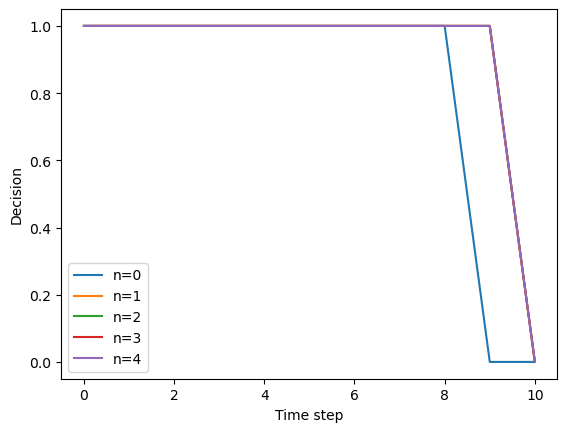

In [8]:
import matplotlib.pyplot as plt

# Assuming D is a numpy array containing the decision values
# and n represents the number of values in D

for nn in range(n):
    plt.plot(D[nn, :], label=f'n={nn}')

plt.xlabel('Time step')
plt.ylabel('Decision')
plt.legend()
plt.show()
